In [1]:
import pandas as pd
import missingno

In [4]:
#Carga el excel en un Dataframe
df= pd.read_excel('//home/antonio/Documentos/BV/Data/BV Safety_All Safety Walks.xlsx',engine='openpyxl')
df.columns

Index(['Application: BV Safety', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39'],
      dtype='object')

In [13]:
df1=df.drop([0,1,2,3])

In [14]:
new_header = df1.iloc[0] #grab the first row for the header
df2 = df1[1:] #take the data less the header row
df2.columns = new_header #set the header row as the df header

In [8]:
df3=df2.reset_index()

In [10]:
df4 = df3.rename(columns = {'Number':'Número',
                            'Created Date':'Fecha de creación',
                            'Name of the Observer':'Nombre del observador',
                            'Name of the Observed Person(s)':'Nombre de la persona o personas observadas',
                            'Operating Group':'Grupo Operativo',
                            'Country':'País',
                            'Entity':'Entidad',
                            'Site':'Sitio',
                            'BV Site Name':'Nombre del sitio de BV',
                            'Client Name':'Nombre del cliente',
                            'Site Address':'Dirección del sitio',
                            '1. Mind On Task?': '1. ¿Mente en la tarea?', 
                            '2. Eyes on Task?': '2. ¿Ojos puestos en la tarea?',
                            '3. Using equpment properly?': "3. ¿Utiliza el equipo correctamente?",
                            '4. Performing task while not rushing?': "4. ¿Realiza una tarea sin apresurarse?",
                            '5. Wearing prescribed PPE?': '5. ¿Lleva el PPE prescrito?',
                            '6. Following Safe Working Procedures?':'6. ¿Sigue procedimientos de trabajo seguros?',
                            '7. Authorization is obtained...':'7. Se obtiene la autorización ...',
                            '8. Check surrounding work areas...':'8. Revise las áreas de trabajo circundantes ...',
                            '9. Personnel acted safely for the task observed':'9. El personal actuó con seguridad para la tarea observada.',
                            '10. Aware of the Emergency Evacuation...':'10. Consciente de la evacuación de emergencia ...',
                            '11. The person is aware of the need to report near hit and unsafe situation.':'11. La persona es consciente de la necesidad de informar de una situación peligrosa y cercana al impacto.',
                            '12. Personnel stops Working if the situation is unsafe.':'12. El personal deja de trabajar si la situación no es segura.',
                            '13. Personnel is competent and trained...':'13. El personal es competente y está capacitado ...',
                            '14. Adequate and worn correctly the applicable PPE':'14. Adecuado y usado correctamente el PPE aplicable',
                            '15. Good conditions, well maintained and properly stored.':'15. Buen estado, bien mantenido y almacenado correctamente.',
                            '16. Good housekeeping of the work area...':'16. Buen mantenimiento del área de trabajo ...',
                            '17. Area Free of Slip Trip and Fall Hazards':'17. Área libre de peligros de tropiezos y caídas',
                            '18. Walkways, aisles, emergency exits...':'18. Pasillos, pasillos, salidas de emergencia ...',
                            '19. Spillage controlled':'19. Derrames controlados',
                            '20. All containers in use and in the area are labelled.':'20. Todos los contenedores en uso y en el área están etiquetados.',
                            '21. No Noise, Dust, Odor Issues':'21. Sin ruidos, polvo ni olores',
                            '22. Hazardous substances are stored properly':'22. Las sustancias peligrosas se almacenan adecuadamente',
                            '23. The work area is secured from hazards...':'23. El área de trabajo está protegida contra peligros ...',
                            '24. Sufficient lighting and ventilation.':'24. Iluminación y ventilación suficientes.',
                            '25. Use intrinsically safe equipment...':'25. Utilice equipo intrínsecamente seguro ...',
                            '26. Machine guarding or Lock-Out-Tag-Out...':'26. Protección o bloqueo-etiquetado de la máquina ...',
                            '27. Scaffold or ladder is safe for use.':'27. El andamio o la escalera son seguros para su uso.',
                            'Did I use my Stop Work Authority?':'¿Usé mi autorización para detener el trabajo?',
                            'Comments / Action Plan':'Comentarios / Plan de acción'},
                            
                                             inplace = False)
                                        
                                        
                                        
                                        

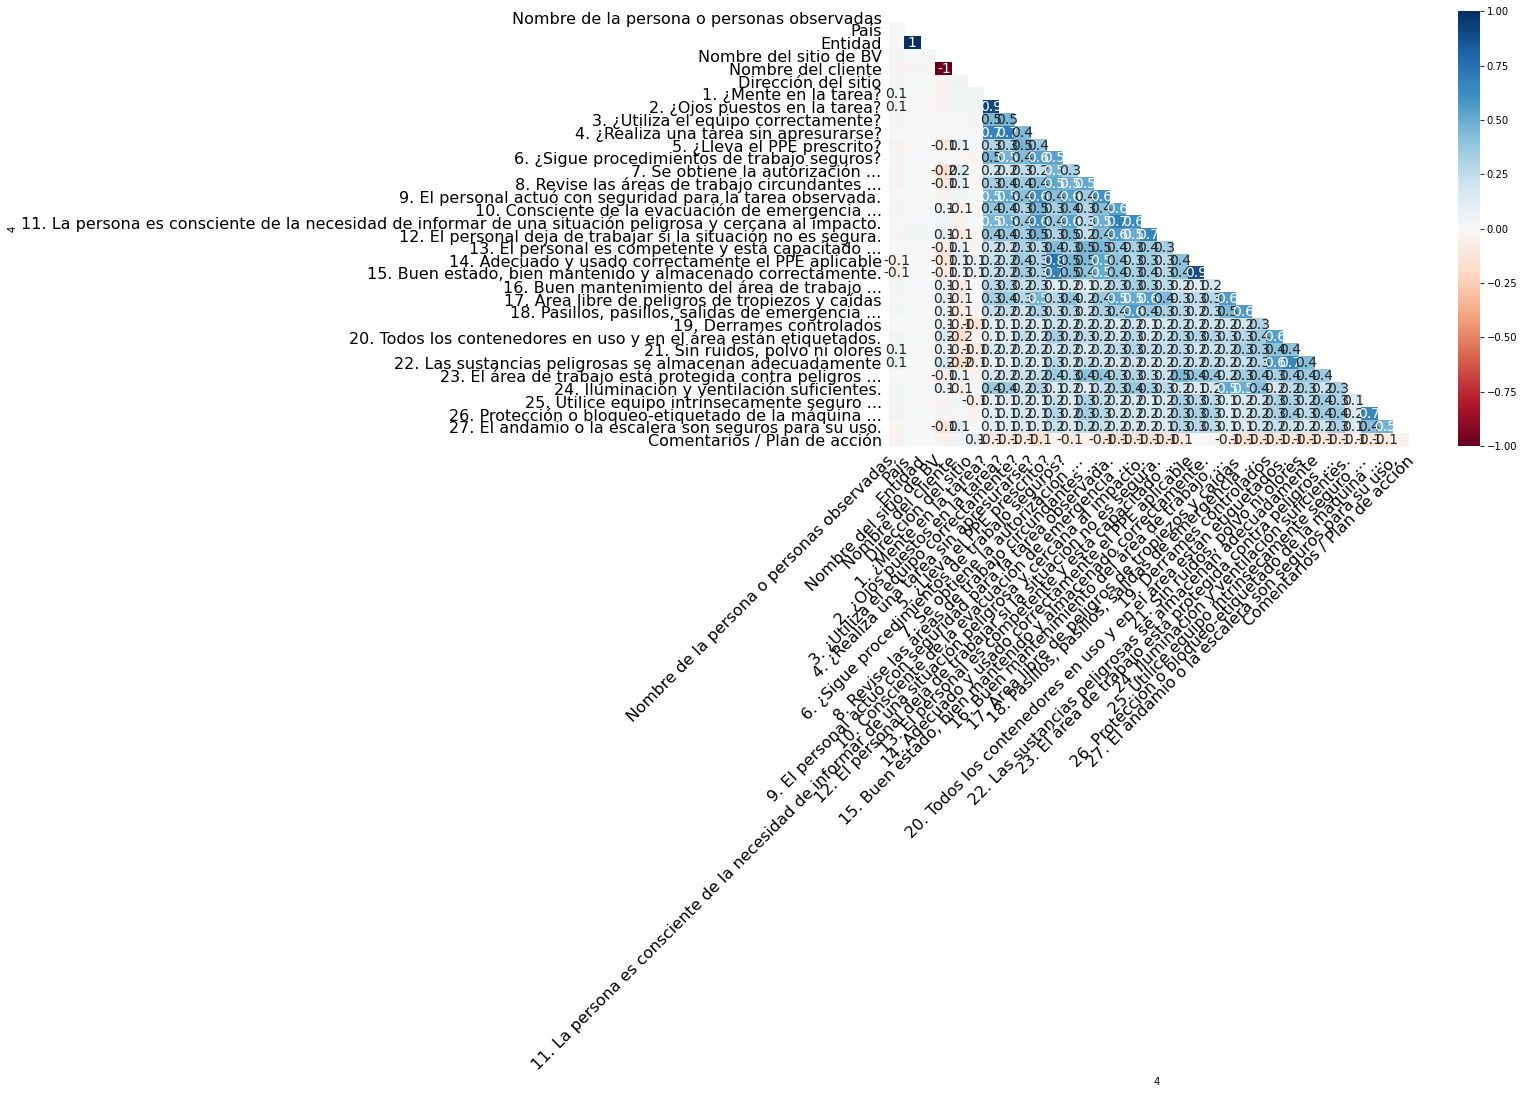

In [12]:
missingno.heatmap(df4, figsize=(12,8))

In [ ]:
nombres=[]
for e in df4['Nombre del observador']:
        word_list = e.split()
        if word_list[-1].isupper()==True:
            df4["Nombre de Usuario"]='No tiene usuario'
            nombres.append(word_list)
        if word_list[-1].isupper()==False:
            df4["Nombre de Usuario"]=word_list[-1]
            word_list.remove(word_list[-1])
            nombres.append(word_list)

In [ ]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))

In [ ]:
nombres2=[]
for e in nombres:
    nombres2.append(listToString(e))
    

In [ ]:
df4['Nombre del observador']=nombres2
df4['Nombre del observador']= df4['Nombre del observador'].str.lower()

In [ ]:
df4.reset_index(drop=True, inplace=True)
df4.head()

In [ ]:
lista_pais=pd.unique(df4['País']).tolist()
lista_pais

In [ ]:

clean_country = df4[(df4['País'] != ' Spain ')& (df4['País'] != ' Portugal ')].index
# Delete these row indexes from dataFrame
df4.drop(clean_country , inplace=True)

In [ ]:
lista_grupo=pd.unique(df4['Grupo Operativo']).tolist()
lista_grupo

In [ ]:
clean_grupo = df4[(df4['Grupo Operativo'] != 'S&WE - SWE ')].index
# Delete these row indexes from dataFrame
df4.drop(clean_grupo, inplace=True)

In [ ]:
df4.shape

In [ ]:
df4.to_excel('//home/antonio/Documentos/Safety_Clean.xlsx')

In [ ]:
import missingno 

%matplotlib inline

simple_data=df4.sample(len(df4))

missingno.bar(simple_data)